In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from tensorflow.keras.layers import Dense , Dropout , Conv2D , MaxPooling2D, Flatten , BatchNormalization

In [2]:
(x_train , y_train) , (x_test , y_test) = tf.keras.datasets.cifar10.load_data()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170508288/170498071 [==============================] - 2640s 15us/step


In [3]:
print('x_train shape' , x_train.shape)
print('y_train shape' , y_train.shape)

x_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)


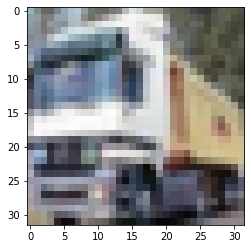

In [4]:
plt.imshow(x_train[1])

In [5]:
def normalize(x):
    x = x.astype('float32')
    x = x/255.0
    return x

In [6]:
datagen = ImageDataGenerator(
                            rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True,
)

In [7]:
from sklearn.model_selection import train_test_split
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size = 0.5, random_state = 0)

In [8]:
x_train = normalize(x_train)
x_test = normalize(x_test)
x_val = normalize(x_val)

y_train = tf.keras.utils.to_categorical(y_train , 10)
y_test = tf.keras.utils.to_categorical(y_test , 10)
y_val  = tf.keras.utils.to_categorical(y_val , 10)

datagen.fit(x_train)

In [9]:
def results(model):
    epoch = 100
    r = model.fit(datagen.flow(x_train , y_train , batch_size = 32), epochs = epoch  ,steps_per_epoch=len(x_train)/32, validation_data = (x_val , y_val) , verbose = 1)
    acc = model.evaluate(x_test , y_test)
    print("test set loss : " , acc[0])
    print("test set accuracy :", acc[1]*100)

    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, r.history['accuracy'])
    plt.plot(epoch_range, r.history['val_accuracy'])
    plt.title('Classification Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='lower right')
    plt.show()

    # Plot training & validation loss values
    plt.plot(epoch_range,r.history['loss'])
    plt.plot(epoch_range, r.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='lower right')
    plt.show()

In [10]:
weight_decay = 1e-4
model = Sequential([
                    Conv2D(32, (3, 3), activation='relu', padding='same',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), input_shape=(32, 32, 3)),
                    BatchNormalization(),
                    Conv2D(32, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    MaxPooling2D((2, 2)),
                    Dropout(0.2),
                    Conv2D(64, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    Conv2D(64, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    MaxPooling2D((2, 2)),
                    Dropout(0.3),
                    Conv2D(128, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    Conv2D(128, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    MaxPooling2D((2, 2)),
                    Dropout(0.3),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(10, activation='softmax')                    
])

opt =    tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\Aniket\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [11]:
results(model)

Epoch 1/100
1562/1562 [==============================] - 349s 223ms/step - loss: 1.7251 - accuracy: 0.3844 - val_loss: 1.3926 - val_accuracy: 0.5040
Epoch 2/100
1562/1562 [==============================] - 381s 244ms/step - loss: 1.4102 - accuracy: 0.5008 - val_loss: 1.2536 - val_accuracy: 0.5600
Epoch 3/100
1562/1562 [==============================] - 393s 251ms/step - loss: 1.2616 - accuracy: 0.5577 - val_loss: 1.3052 - val_accuracy: 0.5726
Epoch 4/100
1562/1562 [==============================] - 387s 248ms/step - loss: 1.1536 - accuracy: 0.5994 - val_loss: 1.0802 - val_accuracy: 0.6382
Epoch 5/100
1562/1562 [==============================] - 386s 247ms/step - loss: 1.0681 - accuracy: 0.6312 - val_loss: 1.1845 - val_accuracy: 0.6112
Epoch 6/100
1562/1562 [==============================] - 388s 248ms/step - loss: 1.0116 - accuracy: 0.6530 - val_loss: 1.1142 - val_accuracy: 0.6394
Epoch 7/100
1562/1562 [==============================] - 1440s 922ms/step - loss: 0.9684 - accuracy: 0.670

KeyboardInterrupt: 

In [ ]:
model.save("model.hdf5")